In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/COVID-19/master/covid_19_datasets/covid_19_globaldata/covid_19_world.csv')

In [3]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
20569,20570,05/01/2020,Wyoming,US,2020-05-02 02:32:27,566.0,7.0,0.0
20570,20571,05/01/2020,Xinjiang,Mainland China,2020-05-02 02:32:27,76.0,3.0,73.0
20571,20572,05/01/2020,Yukon,Canada,2020-05-02 02:32:27,11.0,0.0,0.0
20572,20573,05/01/2020,Yunnan,Mainland China,2020-05-02 02:32:27,185.0,2.0,181.0


In [4]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,20574.000000,20574.000000,20574.000000,20574.000000
mean,10287.500000,3759.672840,235.671624,999.194615
std,5939.346555,17740.018084,1656.794253,7050.768499
min,1.000000,0.000000,0.000000,0.000000
25%,5144.250000,11.000000,0.000000,0.000000
50%,10287.500000,125.000000,1.000000,2.000000
75%,15430.750000,855.000000,12.000000,93.000000
max,20574.000000,308314.000000,28236.000000,164015.000000


In [5]:
df.head()


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [8]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     10548
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [11]:
df['Confirmed'].sum()

77351509.0

In [12]:
df.drop('SNo', axis=1, inplace=True)

# Date formatting of ObservationDate column and Last Update column

In [17]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [18]:
pd.to_datetime(df['Last Update'])

0       2020-01-22 17:00:00
1       2020-01-22 17:00:00
2       2020-01-22 17:00:00
3       2020-01-22 17:00:00
4       2020-01-22 17:00:00
                ...        
20569   2020-05-02 02:32:27
20570   2020-05-02 02:32:27
20571   2020-05-02 02:32:27
20572   2020-05-02 02:32:27
20573   2020-05-02 02:32:27
Name: Last Update, Length: 20574, dtype: datetime64[ns]

In [19]:
df

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
20569,2020-05-01,Wyoming,US,2020-05-02 02:32:27,566.0,7.0,0.0
20570,2020-05-01,Xinjiang,Mainland China,2020-05-02 02:32:27,76.0,3.0,73.0
20571,2020-05-01,Yukon,Canada,2020-05-02 02:32:27,11.0,0.0,0.0
20572,2020-05-01,Yunnan,Mainland China,2020-05-02 02:32:27,185.0,2.0,181.0


In [21]:
df_datewise = df.groupby(['ObservationDate']).agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum'})

In [48]:
df_countrywise = df.groupby(['Country/Region'])
# .agg({'ObservationDate':, 'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum'})

In [50]:
# df.loc['India']
# df.loc['India'].transpose().iplot(title = 'Time series confirmed cases in India', color = 'blue')
df_countrywise

In [44]:
df_datewise.head()

,Confirmed,Deaths,Recovered,Days
ObservationDate,,,,
2020-01-22,555.0,17.0,28.0,0
2020-01-23,653.0,18.0,30.0,1
2020-01-24,941.0,26.0,36.0,2
2020-01-25,1438.0,42.0,39.0,3
2020-01-26,2118.0,56.0,52.0,4


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

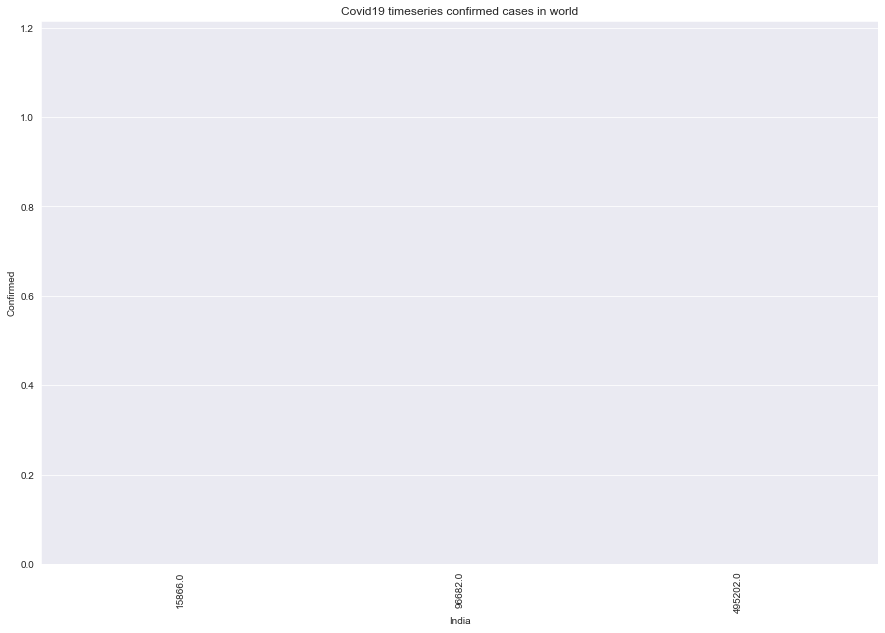

In [41]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.barplot(x = df_countrywise.loc['India'].transpose(), y = df_countrywise['Confirmed'])
plt.title("Covid19 timeseries confirmed cases in world")
plt.xticks(rotation = 90)

In [22]:
df_datewise.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [23]:
df_datewise.tail()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-04-27,3041764.0,211167.0,893967.0
2020-04-28,3116398.0,217153.0,928658.0
2020-04-29,3193886.0,227638.0,972719.0
2020-04-30,3256846.0,233388.0,1014753.0
2020-05-01,3343777.0,238650.0,1053327.0


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 <a list of 101 Text xticklabel objects>)

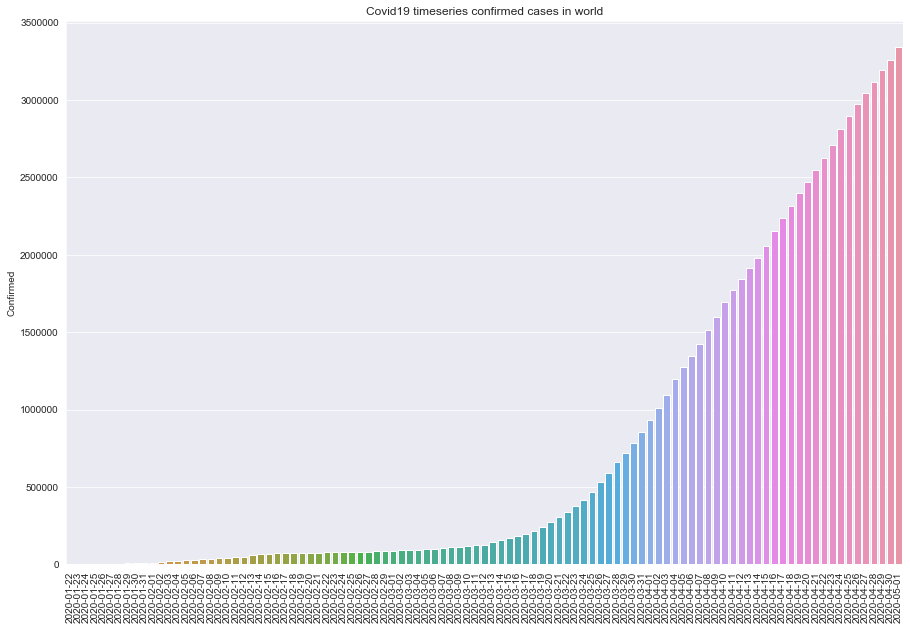

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.barplot(x = df_datewise.index.date, y = df_datewise['Confirmed'])
plt.title("Covid19 timeseries confirmed cases in world")
plt.xticks(rotation = 90)

<function matplotlib.pyplot.show(*args, **kw)>

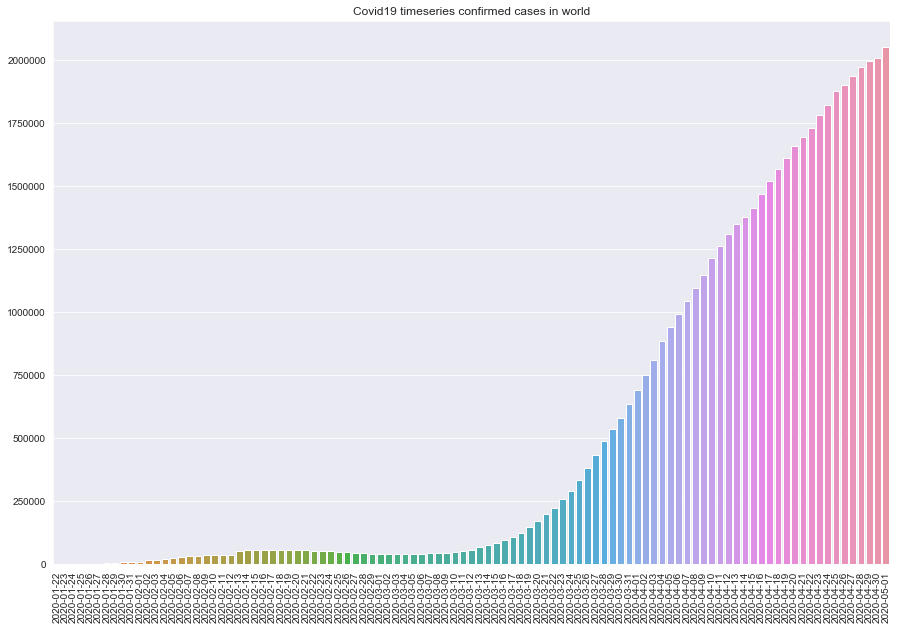

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
activ_cases=df_datewise['Confirmed']-df_datewise['Recovered']-df_datewise['Deaths']
sns.barplot(x = df_datewise.index.date, y = activ_cases)
plt.title("Covid19 timeseries confirmed cases in world")
plt.xticks(rotation = 90)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

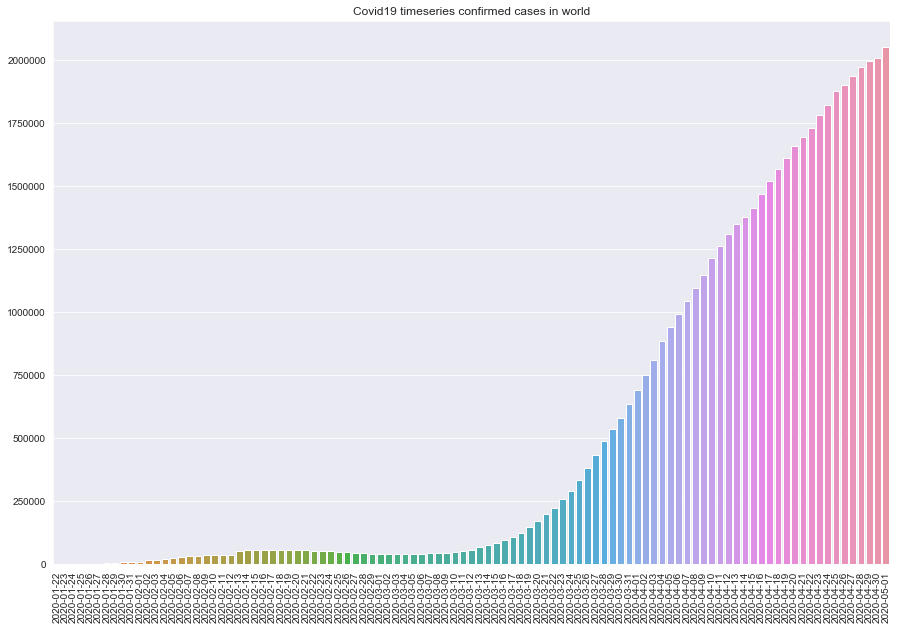

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.barplot(x = df_datewise.index.date, y = df_datewise['Confirmed']-df_datewise['Recovered']-df_datewise['Deaths'])
plt.title("Covid19 timeseries confirmed cases in world")
plt.xticks(rotation = 90)
plt.show

# Predictions and forecasting

# Linear Regression

In [39]:
df_datewise ['Days'] = df_datewise.index - df_datewise.index[0]
df_datewise ['Days'] = df_datewise['Days'].dt.days
df_datewise

,Confirmed,Deaths,Recovered,Days
ObservationDate,,,,
2020-01-22,555.0,17.0,28.0,0
2020-01-23,653.0,18.0,30.0,1
2020-01-24,941.0,26.0,36.0,2
2020-01-25,1438.0,42.0,39.0,3
2020-01-26,2118.0,56.0,52.0,4
...,...,...,...,...
2020-04-27,3041764.0,211167.0,893967.0,96
2020-04-28,3116398.0,217153.0,928658.0,97
2020-04-29,3193886.0,227638.0,972719.0,98


# Time Series

In [84]:
train_ml = df_datewise.iloc[:int(df_datewise.shape[0]*0.9)]
train_ml


,Confirmed,Deaths,Recovered,Days
ObservationDate,,,,
2020-01-22,555.0,17.0,28.0,0
2020-01-23,653.0,18.0,30.0,1
2020-01-24,941.0,26.0,36.0,2
2020-01-25,1438.0,42.0,39.0,3
2020-01-26,2118.0,56.0,52.0,4
...,...,...,...,...
2020-04-16,2152647.0,143801.0,542107.0,85
2020-04-17,2240191.0,153822.0,568343.0,86
2020-04-18,2317759.0,159510.0,592319.0,87


In [88]:
test_ml = df_datewise.iloc[int(df_datewise.shape[0]*0.9):]
test_ml

,Confirmed,Deaths,Recovered,Days
ObservationDate,,,,
2020-04-21,2549123.0,176583.0,679819.0,90
2020-04-22,2623960.0,183066.0,709694.0,91
2020-04-23,2708885.0,190858.0,738486.0,92
2020-04-24,2810715.0,197151.0,793420.0,93
2020-04-25,2896746.0,202846.0,816685.0,94
2020-04-26,2971475.0,206544.0,865733.0,95
2020-04-27,3041764.0,211167.0,893967.0,96
2020-04-28,3116398.0,217153.0,928658.0,97
2020-04-29,3193886.0,227638.0,972719.0,98


In [89]:
train_ml.shape


(90, 4)

In [90]:
test_ml.shape


(11, 4)

In [91]:
## ML - Linear Regression
## sklearn package 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)

In [96]:
# x = np.array(train_ml['Confirmed']).reshape(-1,1)
X = np.array(train_ml['Days']).reshape(-1,1)
Y = np.array(train_ml['Confirmed']).reshape(-1,1)


In [95]:
Y

array([[5.550000e+02],
       [6.530000e+02],
       [9.410000e+02],
       [1.438000e+03],
       [2.118000e+03],
       [2.927000e+03],
       [5.578000e+03],
       [6.165000e+03],
       [8.235000e+03],
       [9.925000e+03],
       [1.203800e+04],
       [1.678700e+04],
       [1.988100e+04],
       [2.389200e+04],
       [2.763600e+04],
       [3.081800e+04],
       [3.439200e+04],
       [3.712100e+04],
       [4.015100e+04],
       [4.276300e+04],
       [4.480300e+04],
       [4.522200e+04],
       [6.037000e+04],
       [6.688700e+04],
       [6.903200e+04],
       [7.122600e+04],
       [7.326000e+04],
       [7.513800e+04],
       [7.564100e+04],
       [7.619900e+04],
       [7.684300e+04],
       [7.859900e+04],
       [7.898500e+04],
       [7.957000e+04],
       [8.041500e+04],
       [8.139700e+04],
       [8.275600e+04],
       [8.412400e+04],
       [8.601300e+04],
       [8.837100e+04],
       [9.030900e+04],
       [9.284400e+04],
       [9.512400e+04],
       [9.7

In [97]:
lin_reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [98]:
## Prediction
predicted_value = lin_reg.predict(np.array(test_ml['Days']).reshape(-1,1))

In [99]:
predicted_value_all = lin_reg.predict(np.array(df_datewise['Days']).reshape(-1,1))

In [100]:
## Plot the predicted vs Actual value


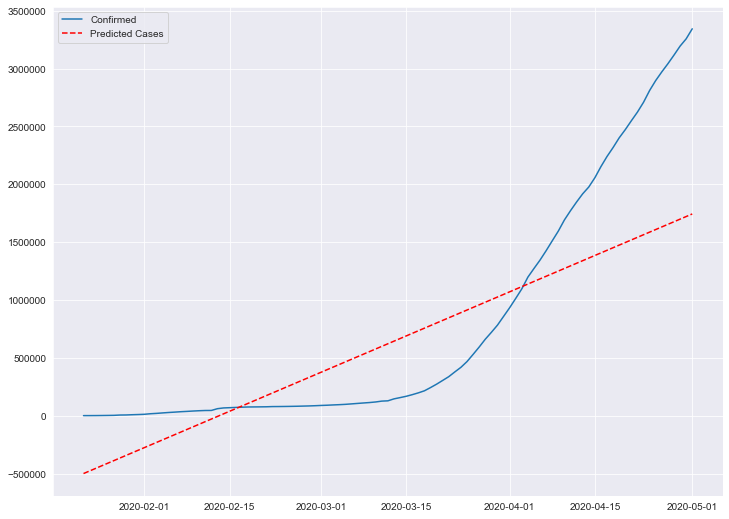

In [101]:
plt.figure(figsize=(12,9))
plt.plot(df_datewise['Confirmed'], label = 'Confirmed')
plt.plot(df_datewise.index, predicted_value_all, linestyle = '--', color = 'red', label = 'Predicted Cases')
plt.legend()
plt.show()

In [ ]:
lin_reg.score(Y , predicted_value)

# FBProphet - ARIMA (Auto Regressive Integrated Moving Average)

In [102]:
from fbprophet import Prophet

In [128]:
prophet_model = Prophet(interval_width=0.95, weekly_seasonality=True, daily_seasonality=True)

In [129]:
## input samples for fbprophet
prophet_confirmed = pd.DataFrame(zip(list(df_datewise.index), list(df_datewise['Confirmed'])), columns=['ds','y'])

In [130]:
prophet_model.fit(prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [131]:
forecast_c = prophet_model.make_future_dataframe(periods=18)

In [132]:
forecast_c

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
114,2020-05-15
115,2020-05-16
116,2020-05-17
117,2020-05-18


In [133]:
confirmed_forecast = prophet_model.predict(forecast_c)

In [134]:
confirmed_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-3.895215e+03,-1.534847e+04,7.225546e+03
1,2020-01-23,-1.909599e+03,-1.332202e+04,9.335757e+03
2,2020-01-24,3.107216e+03,-7.885394e+03,1.463507e+04
3,2020-01-25,6.432049e+03,-4.459037e+03,1.746143e+04
4,2020-01-26,5.728928e+03,-4.811288e+03,1.675219e+04
...,...,...,...,...
114,2020-05-15,4.473609e+06,4.303482e+06,4.635495e+06
115,2020-05-16,4.556230e+06,4.366162e+06,4.736295e+06
116,2020-05-17,4.633955e+06,4.428763e+06,4.830364e+06
117,2020-05-18,4.709884e+06,4.480110e+06,4.930118e+06


In [136]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(df_datewise['Confirmed'],confirmed_forecast['yhat'].head(df_datewise.shape[0])))
print("Root mean squared error for prophet model:", np.sqrt(mean_squared_error(df_datewise['Confirmed'],confirmed_forecast['yhat'].head(df_datewise.shape[0]))))

Root mean squared error for prophet model: 5446.2939732983705


Figure(720x432)


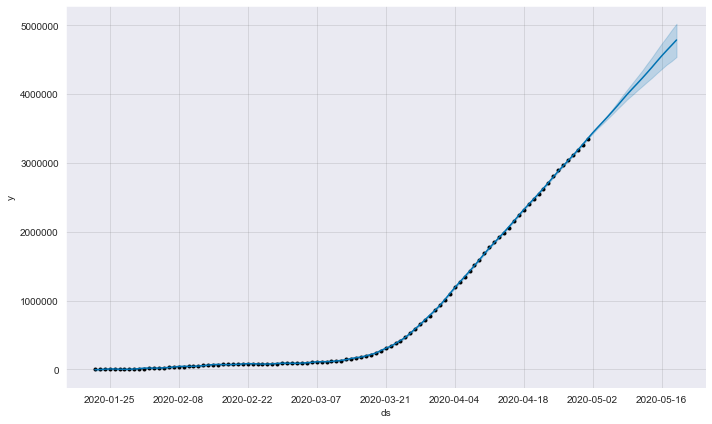

In [137]:
print(prophet_model.plot(confirmed_forecast))

## LSTM - RNN (Recurrent Neural Network)

In [141]:
from keras.models import Sequential
## LSTM - Part of RNN
from keras.layers import LSTM, Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [142]:
df

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
20569,2020-05-01,Wyoming,US,2020-05-02 02:32:27,566.0,7.0,0.0
20570,2020-05-01,Xinjiang,Mainland China,2020-05-02 02:32:27,76.0,3.0,73.0
20571,2020-05-01,Yukon,Canada,2020-05-02 02:32:27,11.0,0.0,0.0
20572,2020-05-01,Yunnan,Mainland China,2020-05-02 02:32:27,185.0,2.0,181.0


In [143]:
data = df[df['Country/Region'] == 'India']

In [144]:
data = data.loc[:, ['ObservationDate', 'Confirmed']]

In [145]:
data = data.groupby('ObservationDate')[['Confirmed']].max().reset_index()

In [146]:
data

,ObservationDate,Confirmed
0,2020-01-30,1.0
1,2020-01-31,1.0
2,2020-02-01,1.0
3,2020-02-02,2.0
4,2020-02-03,3.0
...,...,...
88,2020-04-27,29451.0
89,2020-04-28,31324.0
90,2020-04-29,33062.0
91,2020-04-30,34863.0


In [147]:
dataset = data.drop("ObservationDate", axis = 1)

In [148]:
dataset

,Confirmed
0,1.0
1,1.0
2,1.0
3,2.0
4,3.0
...,...
88,29451.0
89,31324.0
90,33062.0
91,34863.0


In [149]:
data = np.array(dataset).reshape(-1,1)
train_data = dataset[:len(dataset)-5]
# for validation take  last 5 values
test_data = dataset[len(dataset)-5:]

In [150]:
##MinMaxScaling for PreProcessing Data
#scaling large samples into equal range of (0,1)
#scaling the dataset
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [151]:
n_input = 5
n_feature = 1

In [153]:
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=10)

In [154]:
#x input value
generator

In [155]:
##LSTM Model
lstm_model = Sequential()
# layer -1
lstm_model.add(LSTM(units = 64, return_sequences= True, input_shape = (n_input, n_feature)))
lstm_model.add(Dropout(0.2))
# Hidden Layer -I
lstm_model.add(LSTM(units = 64, return_sequences= True))
lstm_model.add(Dropout(0.2))
# Hidden Layer -II
lstm_model.add(LSTM(units = 64))
lstm_model.add(Dropout(0.2))
#Ooutput layer
lstm_model.add(Dense(units = 1))

##Optimization & Loss Function
lstm_model.compile(optimizer = 'adam', loss='mean_squared_error')

In [156]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 64)             16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 64)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 64)             33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 64)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [157]:
#Total iterations for training
lstm_model.fit(generator, epochs=53)

Epoch 1/53
9/9 [==============================] - 5s 546ms/step - loss: 0.1269
Epoch 2/53
9/9 [==============================] - 0s 10ms/step - loss: 0.0920
Epoch 3/53
9/9 [==============================] - 0s 14ms/step - loss: 0.0689
Epoch 4/53
9/9 [==============================] - 0s 8ms/step - loss: 0.0484
Epoch 5/53
9/9 [==============================] - 0s 9ms/step - loss: 0.0206
Epoch 6/53
9/9 [==============================] - 0s 12ms/step - loss: 0.0070
Epoch 7/53
9/9 [==============================] - 0s 9ms/step - loss: 0.0167
Epoch 8/53
9/9 [==============================] - 0s 10ms/step - loss: 0.0086
Epoch 9/53
9/9 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 10/53
9/9 [==============================] - 0s 11ms/step - loss: 0.0165
Epoch 11/53
9/9 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 12/53
9/9 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 13/53
9/9 [==============================] - 0s 8ms/step - l

In [158]:
lstm_model.history.history

{'loss': [0.07344948389291825,
  0.05314408843012818,
  0.04237057059913515,
  0.04020277427576752,
  0.01954921147595328,
  0.00588799703653049,
  0.009729459024446803,
  0.008104994827327431,
  0.0026779003316502884,
  0.0075029974511588915,
  0.012107068611149737,
  0.006041447338872555,
  0.003738678596263011,
  0.002058258589780721,
  0.0027078087402175248,
  0.0023828112404212826,
  0.002921218146480261,
  0.0030020016066011892,
  0.0032238995056586756,
  0.0018290840157697606,
  0.0017399472617179558,
  0.0020003890757538736,
  0.0020271064075197765,
  0.003805073463874841,
  0.0023954267107253245,
  0.0014047665770112324,
  0.0014710425709480144,
  0.0011475892515371957,
  0.0018339025393880185,
  0.002320378147860209,
  0.0013944942606556937,
  0.0009531742463264255,
  0.0027421730579611993,
  0.0037184464206977985,
  0.0011810544395751982,
  0.0009484422661915298,
  0.0009507209886425085,
  0.0009516530062025694,
  0.0009320271555586796,
  0.001235954254232375,
  0.0009379351

In [ ]:
pd.DataFrame

In [ ]:
lstm_model.predict